<a href="https://colab.research.google.com/github/shahabday/DSR-practical-computer-vision/blob/main/Scratchpad_Detectron2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.5 ; cuda:  cu124
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

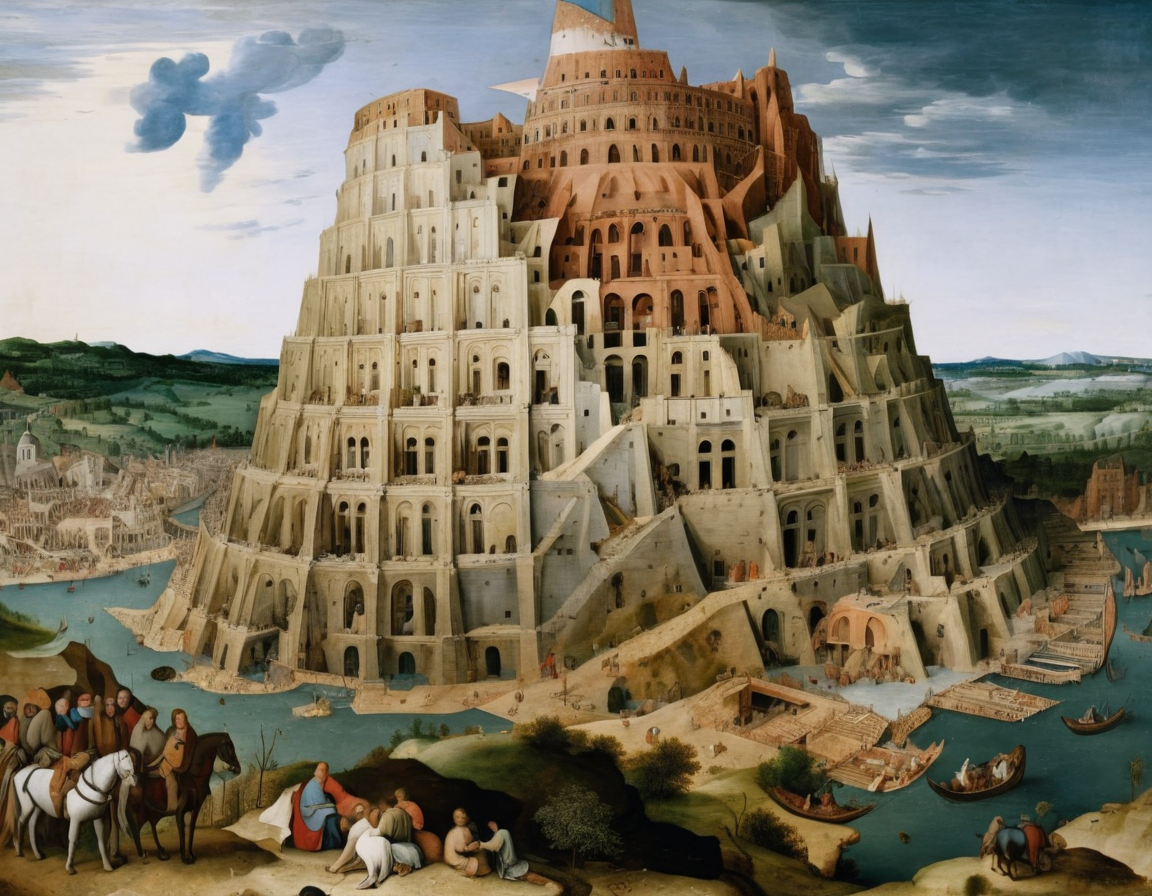

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439714.jpg -q -O input.jpg

!wget https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/babellora01.png -q -O babellora01.png
#!wget https://github.com/andandandand/images-for-colab-notebooks/blob/main/Bear%20Market%202%20-%20DALL%C2%B7E%202023-10-22%2016.41.51%20-%20Illustration%20of%20a%20stock%20market%20floor%20where%20bears%20in%20formal%20attire%20are%20engaged%20in%20animated%20discussions.%20Behind%20them%2C%20electronic%20boards%20display%20falling%20.png?raw=True -q -O bearmarket.png
#!wget https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/Bear%20Market%202%20-%20DALL%C2%B7E%202023-10-22%2016.41.51%20-%20Illustration%20of%20a%20stock%20market%20floor%20where%20bears%20in%20formal%20attire%20are%20engaged%20in%20animated%20discussions.%20Behind%20them%2C%20electronic%20boards%20display%20falling%20.png -q -O bearmarket2.png
im = cv2.imread("./babellora01.png")
cv2_imshow(im)


Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[03/08 16:26:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17, 17,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48,  0,  0,
         0,  0,  0, 48,  0,  0,  0,  0, 48, 24, 45,  0], device='cuda:0')
Boxes(tensor([[ 118.6775,  727.1705,  241.3704,  865.0033],
        [  10.6304,  749.4908,  140.4119,  874.2310],
        [ 128.1382,  705.2506,  166.7961,  783.1957],
        [ 154.9777,  708.7654,  195.0258,  797.0560],
        [ 440.5620,  807.1854,  481.6529,  876.7919],
        [  76.3907,    0.0000, 1112.4834,  864.6859],
        [  46.4069,  690.0905,   96.3279,  819.1401],
        [ 290.6967,  761.1216,  342.7559,  851.9030],
        [ 463.3419,  813.0182,  526.8870,  880.9673],
        [ 318.1797,  783.9874,  397.8209,  885.8128],
        [  21.9913,  688.3444,   68.5592,  765.3691],
        [ 131.9066,  705.1205,  189.9827,  805.4287],
        [ 608.3278,  674.7668,  633.1644,  716.6389],
        [ 113.8211,  689.0150,  144.4986,  748.7897],
        [  53.2813,  685.4516,   93.4408,  761.3719],
        [ 826.7681,  744.9965,

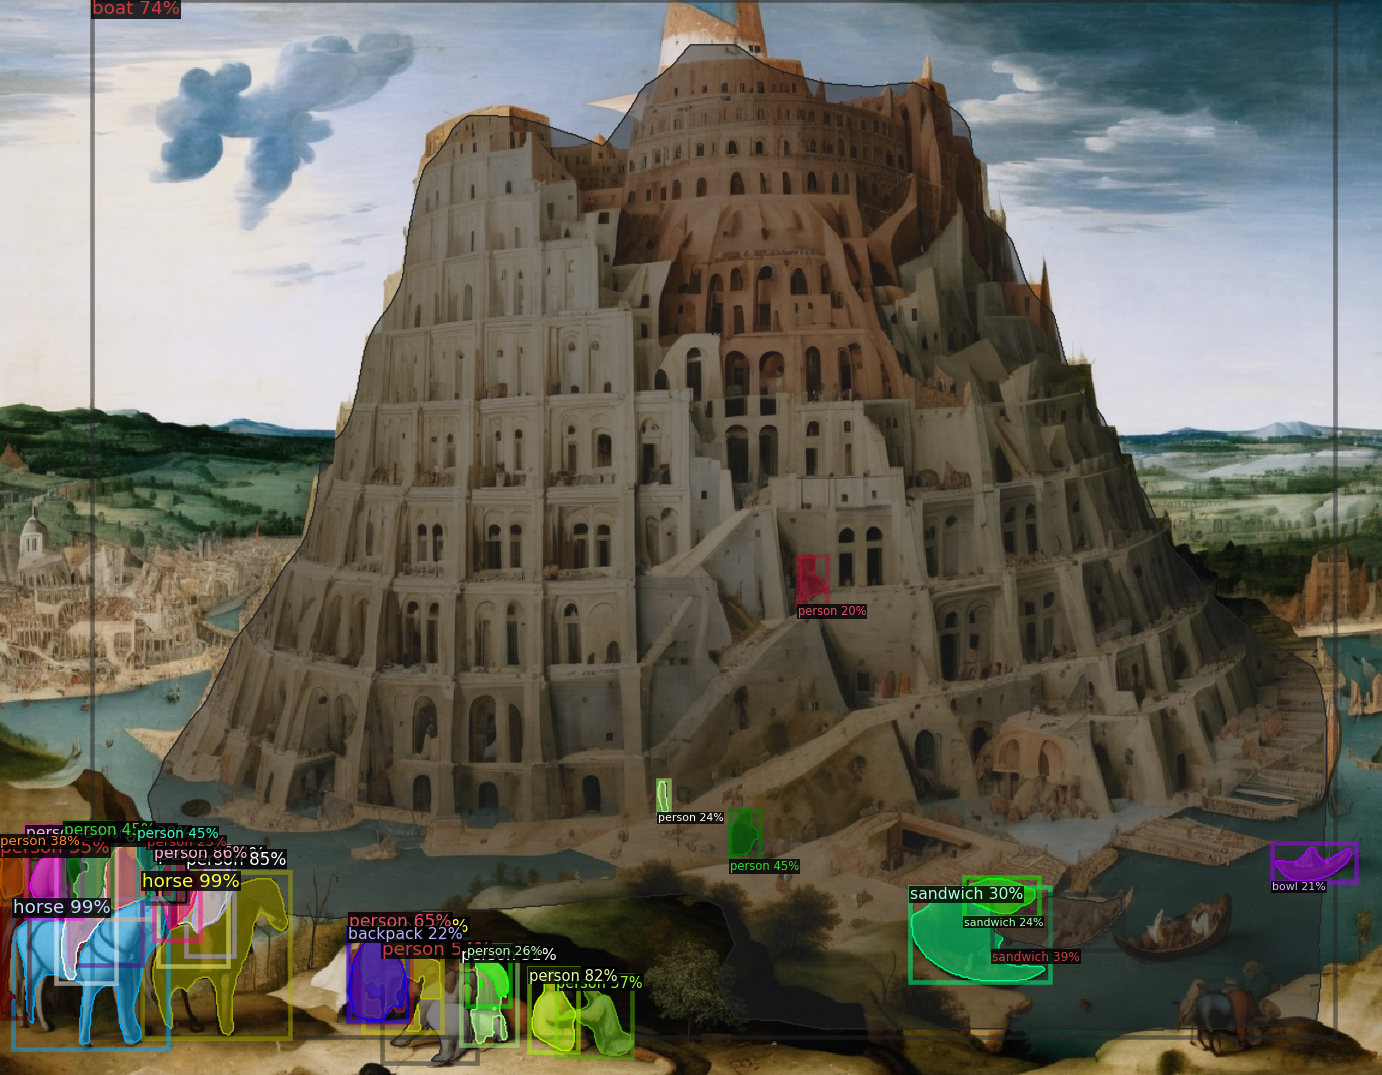

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])